# Module 6: Working with text and files 

In Python, *text* is stored in strings. We learned about strings (`str`) earlier.  

By **text** we mean sequences of characters that make sense to a human. (There are also **binary** files such as executable programs that need to be read by a computer program.)

## Text example: ROT13 encryption
The definition of "human-readable" stretches pretty far: It can also mean encrypted text where we need to know to decrypt. For example, the [rot13 cipher](https://en.wikipedia.org/wiki/ROT13)

![rot13 algorithm](https://www.tutorialspoint.com/cryptography_with_python/images/rot.jpg)
(Source: https://www.tutorialspoint.com/cryptography_with_python/cryptography_with_python_rot13_algorithm.htm)


We can implement the ROT13 algorithm with the help of two string methods
- [`str.maketrans()`](https://docs.python.org/3/library/stdtypes.html#str.maketrans) generates a translation table (note we are using a "static" method of the `str` class!)
- [`s.translate()`](https://docs.python.org/3/library/stdtypes.html#str.translate) applies the translation table

We use it to (badly) encrypt a sentence about Albert Einstein's [annus mirabilis](https://en.wikipedia.org/wiki/Annus_Mirabilis_papers):

In [1]:
# code based on https://www.tutorialspoint.com/cryptography_with_python/cryptography_with_python_rot13_algorithm.htm

rot13trans = str.maketrans(
    'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz',
    'NOPQRSTUVWXYZABCDEFGHIJKLMnopqrstuvwxyzabcdefghijklm')

def rot13(s):
    """Encrypt letters in string `s` with ROT13."""
    return s.translate(rot13trans)


txt = "The year 1905 was Einstein's Annus Mirabilis."
crypt_txt = rot13(txt)
print(crypt_txt)

Gur lrne 1905 jnf Rvafgrva'f Naahf Zvenovyvf.


In [2]:
rot13trans

{65: 78,
 66: 79,
 67: 80,
 68: 81,
 69: 82,
 70: 83,
 71: 84,
 72: 85,
 73: 86,
 74: 87,
 75: 88,
 76: 89,
 77: 90,
 78: 65,
 79: 66,
 80: 67,
 81: 68,
 82: 69,
 83: 70,
 84: 71,
 85: 72,
 86: 73,
 87: 74,
 88: 75,
 89: 76,
 90: 77,
 97: 110,
 98: 111,
 99: 112,
 100: 113,
 101: 114,
 102: 115,
 103: 116,
 104: 117,
 105: 118,
 106: 119,
 107: 120,
 108: 121,
 109: 122,
 110: 97,
 111: 98,
 112: 99,
 113: 100,
 114: 101,
 115: 102,
 116: 103,
 117: 104,
 118: 105,
 119: 106,
 120: 107,
 121: 108,
 122: 109}

By the way, how do we decode a rot13-string?

ROT13 shifts by 13. There are 26 letters in the (English/Latin) alphabet, thus shifting a second time gives the original:
```
s = rot13(rot13(s))
```

In [3]:
rot13(crypt_txt)

"The year 1905 was Einstein's Annus Mirabilis."

(By the way, ROT13 is a very, _very_ weak encryption algorithm...)

## Processing data

data input 
* files
* streams (sensor data, internet feed, ...)
* user input 
   * `input()` (rare in practice) 
   * command line arguments

### commonly used data processing pattern

0. filter lines (e.g., drop comments)
1. strip leading/trailing whitespace
2. parse: split on separator
3. cast to number (or other data type)

### Example data 

In [4]:
data = [
    "# test data\n",
    "# date: 2019-09-26\n",
    "@ x y z name\n",
    "0.3 0.4 -0.001 Alice         \n",
    "   1.3e-2    0.456   0  Bob  \n",
    "0.99e-2   -0.34 0.04    Alice\n",
]

In [5]:
data

['# test data\n',
 '# date: 2019-09-26\n',
 '@ x y z name\n',
 '0.3 0.4 -0.001 Alice         \n',
 '   1.3e-2    0.456   0  Bob  \n',
 '0.99e-2   -0.34 0.04    Alice\n']

In [6]:
"".join(data)

'# test data\n# date: 2019-09-26\n@ x y z name\n0.3 0.4 -0.001 Alice         \n   1.3e-2    0.456   0  Bob  \n0.99e-2   -0.34 0.04    Alice\n'

In [7]:
print("".join(data))

# test data
# date: 2019-09-26
@ x y z name
0.3 0.4 -0.001 Alice         
   1.3e-2    0.456   0  Bob  
0.99e-2   -0.34 0.04    Alice



### Line-by-line processing 

Show every line: **raw data**

In [8]:
for line in data:
    print(line)

# test data

# date: 2019-09-26

@ x y z name

0.3 0.4 -0.001 Alice         

   1.3e-2    0.456   0  Bob  

0.99e-2   -0.34 0.04    Alice



#### Whitespace trimming

Remove leading *and* trailing whitespace (space, newlines, tabs) with [`s.strip()`](https://docs.python.org/3/library/stdtypes.html#str.strip):

In [9]:
for line in data:
    line = line.strip()
    print(line)

# test data
# date: 2019-09-26
@ x y z name
0.3 0.4 -0.001 Alice
1.3e-2    0.456   0  Bob
0.99e-2   -0.34 0.04    Alice


#### Data cleaning

Remove non-data lines (can be much more complicate... depends on data). 

In [10]:
for line in data:
    line = line.strip()
    if line.startswith(("#", "@")):
        continue
    print(line)

0.3 0.4 -0.001 Alice
1.3e-2    0.456   0  Bob
0.99e-2   -0.34 0.04    Alice


[`s.startswith()`](https://docs.python.org/3/library/stdtypes.html#str.startswith) is very useful but you might need to write more specialized code).

#### Parsing

Depends on the format of the file. Often uses [`s.split()`](https://docs.python.org/3/library/stdtypes.html#str.split).

In [11]:
for line in data:
    line = line.strip()
    if line.startswith(("#", "@")):
        continue
    values = line.split()
    print(values)

['0.3', '0.4', '-0.001', 'Alice']
['1.3e-2', '0.456', '0', 'Bob']
['0.99e-2', '-0.34', '0.04', 'Alice']


Capturing the values in a list is common practice and makes this approach flexible.

One could also directly use tuple assignment to immediately assign to variables:

In [12]:
for line in data:
    line = line.strip()
    if line.startswith(("#", "@")):
        continue
    x, y, z, name = line.split()
    print("{name}: x={x} y={y} z={z}".format(x=x, y=y, z=z, name=name))

Alice: x=0.3 y=0.4 z=-0.001
Bob: x=1.3e-2 y=0.456 z=0
Alice: x=0.99e-2 y=-0.34 z=0.04


#### Type conversion

- What Python datatypes do you need? 
- In what data structures do you want to keep them?

Here: Two lists: `names` and `positions`.
* keep names as str
* convert strings written as numbers to floats 

In [13]:
names = []
positions = []
for line in data:
    line = line.strip()
    if line.startswith(("#", "@")):
        continue
    values = line.split()
    names.append(values[-1])
    x, y, z = values[:3]
    positions.append([float(x), float(y), float(z)])

print(names)
print(positions)

['Alice', 'Bob', 'Alice']
[[0.3, 0.4, -0.001], [0.013, 0.456, 0.0], [0.0099, -0.34, 0.04]]


Better: use **numpy arrays**

In [15]:
import numpy as np

In [16]:
names = []
positions = []
for line in data:
    line = line.strip()
    if line.startswith(("#", "@")):
        continue
    values = line.split()
    names.append(values[-1])
    positions.append(values[:3])

names = np.array(names)
positions = np.array(positions, dtype=np.float64)
    
print(names)
print(positions)

['Alice' 'Bob' 'Alice']
[[ 0.3     0.4    -0.001 ]
 [ 0.013   0.456   0.    ]
 [ 0.0099 -0.34    0.04  ]]


Setting the `dtype=np.float64` makes numpy convert the strings to float64. This is the fastest way to convert a list of strings to numbers.

## Reading data from files 

We learn how to 
1. **read text files** (containing data) and 
2. **process** them into **data structures** that we can work with.

Use example data file `the_hunt.dat` (see notebook [example_data_hunter_food_game.ipynb](example_data_hunter_food_game.ipynb) for how the data were generated):
```
# stochastic hunter-prey simulation
# t x y name
0 -87.8942 -14.6517 food
0 0 0 hunter
1 -87.2301 -15.5329 food
2 -1.08562 -1.1511 hunter
...
```

Read the file and create separate arrays for the positions of hunter and prey.

Finally, plot them.

In [17]:
xH = []
xF = []

with open("the_hunt.dat") as data:
    for line in data:
        line = line.strip()
        if line.startswith("#"):
            continue
        values = line.split()
        name = values[3]
        txy = values[:3]
        if name == "hunter":
            xH.append(txy)
        elif name == "food":
            xF.append(txy)
        else:
            raise ValueError("Unknown name '{name}' in file.".format(name=name))
xH = np.array(xH, dtype=np.float64).T
xF = np.array(xF, dtype=np.float64).T

Data inspection: compare to 
```
0 -87.8942 -14.6517 food
0 0 0 hunter
1 -87.2301 -15.5329 food
2 -1.08562 -1.1511 hunter
...
```

In [18]:
xH.shape

(3, 414)

In [19]:
xH[:, :5] 

array([[ 0.      ,  2.      ,  4.      ,  6.      ,  7.      ],
       [ 0.      , -1.08562 , -0.390038, -2.83016 , -3.20459 ],
       [ 0.      , -1.1511  , -2.67696 , -3.29305 , -2.753   ]])

In [20]:
xF[:, :5]

array([[  0.    ,   1.    ,   3.    ,   5.    ,   8.    ],
       [-87.8942, -87.2301, -88.1058, -88.9286, -89.7612],
       [-14.6517, -15.5329, -16.3371, -17.128 , -17.0966]])

#### Plot the data!

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.matplotlib.style.use("seaborn-talk")

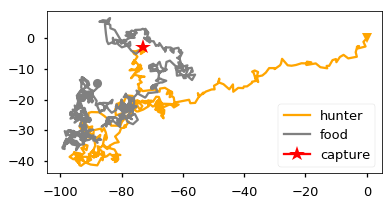

In [22]:
plt.plot(xH[1], xH[2], color="orange", label="hunter")
plt.plot(xH[1, 0], xH[2, 0], color="orange", marker="v")
plt.plot(xF[1], xF[2], color="gray", label="food")
plt.plot(xF[1, 0], xF[2, 0], color="gray", marker="o")
plt.plot(xF[1, -1], xF[2, -1], color="red", marker="*", markersize=16, label="capture")
plt.legend(loc="best")
ax = plt.gca()
ax.set_aspect("equal")

## Writing data 

* iterate through data structure
* write each line to the file

Let's write the data for the hunter to a separate file and also convert the time column to an integer:

In [23]:
with open("hunter.csv", "w") as output:
    for t, x, y in xH.T:
        output.write("{t:d},{x:f},{y:f}\n".format(t=int(t), x=x, y=y))

For more on formatting strings, see [pyformat.info](https://pyformat.info/) and the [Python docs on string formatting](https://docs.python.org/3/library/string.html#string-formatting).

Note that the newline `\n` is important because `write()` does not output a newline. It is more primitive than `print()`.

Have a quick look at the first few lines of the file:

In [24]:
open("hunter.csv").readlines()[:3]

['0,0.000000,0.000000\n', '2,-1.085620,-1.151100\n', '4,-0.390038,-2.676960\n']

You can also use `print()` instead of `file.write()`:
```python
print(..., file=output)
```
(and have the newline automatically added):

In [25]:
with open("food.csv", "w") as output:
    for t, x, y in xF.T:
        print("{t:d},{x:f},{y:f}".format(t=int(t), x=x, y=y), file=output)

In [26]:
open("food.csv").readlines()[:3]

['0,-87.894200,-14.651700\n',
 '1,-87.230100,-15.532900\n',
 '3,-88.105800,-16.337100\n']

## Summary: data processing

- open files with `with open(name) as data:`
- iterate line by line
- clean lines (`strip()`, `startswith()`)
- parse data (`split()`)
- convert and pack into data structures (numpy arrays!)